# Logistic Regression

- Binary Classification model

## Breast Cancer Example 

### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn.model_selection import KFold   # K-fold cross validation
from sklearn import metrics

### Import dataset

In [3]:
# from sklearn.datasets import load_breast_cancer

- download from Kaggle site (breast_cancer.csv of Wisconsin)
  - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
  - little different from sklearn.datasets.load_breast_cancer() in column names

In [4]:
data = pd.read_csv('archive.zip')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Analysis and Preprocessing

In [5]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [6]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


필요없는 특성(Unnamed: 32)을 삭제한다. 

In [7]:
data.drop('Unnamed: 32',axis=1,inplace=True)

In [8]:
data_org = data.copy()
id(data), id(data_org)

(1591839791376, 1593003624480)

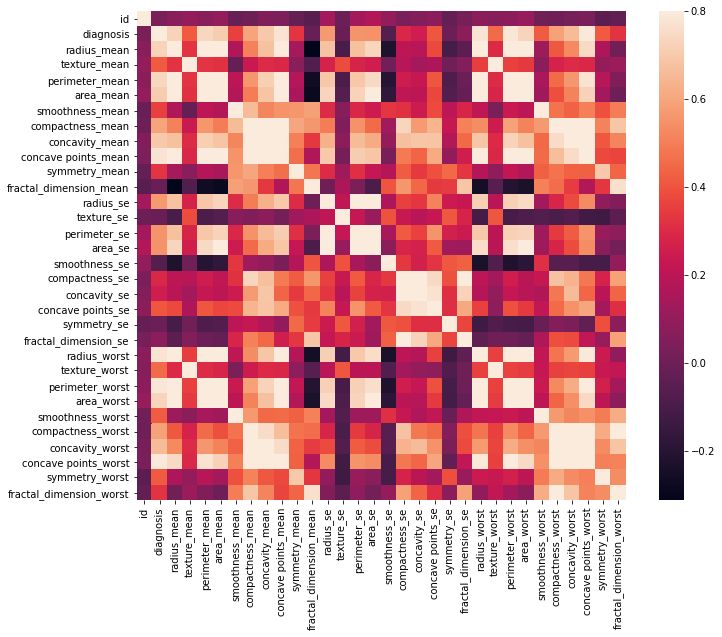

In [9]:
corrmat = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [10]:
corrmat.nlargest(5, 'diagnosis').index   # just for checking

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst'],
      dtype='object')

In [11]:
corrmat.sort_values(by='diagnosis', ascending=False).head()   # just for checking

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
concave points_worst,0.035174,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
perimeter_worst,0.079986,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.082405,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492


In [12]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

두 개의 특성만 사용

In [13]:
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34


### Use each feature seperately

위에서 선택한 두 개의 특성에 대해 각각 이진 분류를 수행해본다. 

#### radius_mean

In [14]:
model=LogisticRegression()
y = df["diagnosis"]

In [15]:
features = ["radius_mean"] # high correlation
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))
print(model.coef_, model.intercept_)

Score: 85.38%
[[1.03283783]] [-15.35824085]


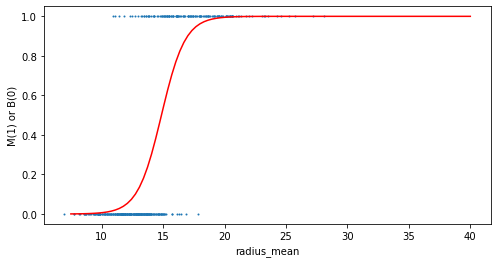

In [16]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logistic(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_ * XX + model.intercept_)[0], c='r')

#### texture_mean

In [17]:
features = ["texture_mean"] # low correlation
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 69.59%


In [18]:
print(model.coef_, model.intercept_)

[[0.24875651]] [-5.42869688]


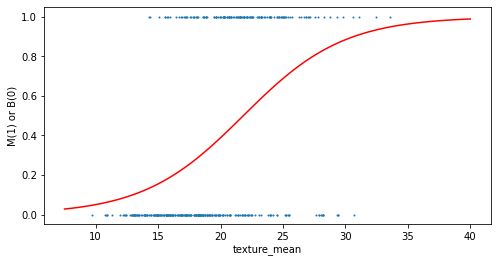

In [19]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_ * XX + model.intercept_)[0], c='r')

### Use two features

In [20]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 89.47%


#### Plot two features (mean_radius, texture_radius)

Text(0, 0.5, 'texture_mean')

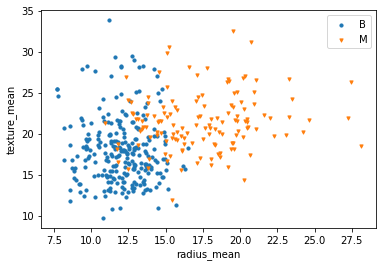

In [21]:
markers = ['o', 'v']
label = ["B", "M"]         # 양성, 악성
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

#### Plot other two features (concave points_worst, perimeter_worst)

Score: 94.15%


Text(0, 0.5, 'perimeter_worst')

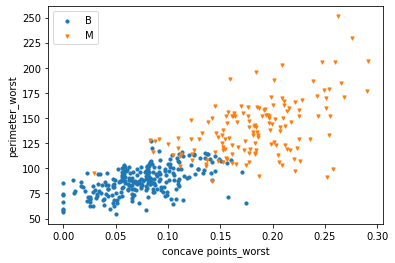

In [22]:
# one more time with two most correlated features
# 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst']
features = ["concave points_worst", "perimeter_worst"]

X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["concave points_worst"][y_train == i]
    ys = X_train["perimeter_worst"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

#### With scaling

Score: 95.32%


Text(0, 0.5, 'perimeter_worst')

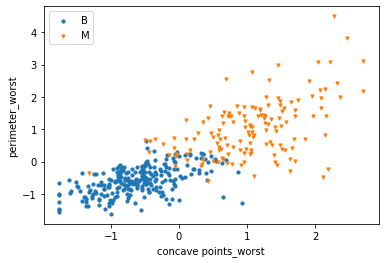

In [23]:
# with scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
model.fit(X_train_sc, y_train)
X_test_sc = sc.transform(X_test)

print("Score: {0:.2%}".format(model.score(X_test_sc, y_test)))

markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train_sc[:,0][y_train == i]
    ys = X_train_sc[:,1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

### Use all features
- with scaling

In [24]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행
data = data_org.copy()
data.drop('id',axis=1, inplace=True)
X = data.drop('diagnosis', axis=1)

In [25]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
X_test = sc.transform(X_test)
print("Score: {:.2%}".format(model_all.score(X_train, y_train)))
print("Score: {:.2%}".format(model_all.score(X_test, y_test)))

Score: 99.25%
Score: 95.32%


In [26]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 94.74%
K =  3 -> Score: 95.91%
K =  5 -> Score: 96.49%
K =  7 -> Score: 96.49%
K =  9 -> Score: 97.66%
K =  11 -> Score: 97.66%
K =  13 -> Score: 97.66%
K =  15 -> Score: 96.49%
K =  17 -> Score: 95.91%
K =  19 -> Score: 95.32%


In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 91.23%


In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)    # no. of trees
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 96.49%


# Multi-class Classification

- LogisticRegression classifier(): 
- OvR and softmax() classifier
- In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold

## two features

시각적으로 확인하기 위해 수행

In [30]:
iris = datasets.load_iris()
X, y = iris.data[:,(2,3)], iris.target

X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

**LogisticRegression**에 `multi_class="multinomial"` 또는 `multi_class="ovr"`을 하이퍼 파라미터로 지정하여 **다중 분류**를 수행할 수 있다. 

In [73]:
softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42)
ovr_clf = LogisticRegression(multi_class="ovr", C=10, random_state=42)
softmax_reg.fit(X, y)
ovr_clf.fit(X, y)

LogisticRegression(C=10, multi_class='ovr', random_state=42)

**모델 평가**

In [74]:
softmax_reg.score(X, y), ovr_clf.score(X, y)

(0.96, 0.96)

**모델의 파라미터 확인**

In [75]:
softmax_reg.coef_, softmax_reg.intercept_

(array([[-4.58614563, -2.24129385],
        [ 0.16068263, -2.15860167],
        [ 4.425463  ,  4.39989552]]),
 array([ 18.87514796,   6.3844344 , -25.25958236]))

In [76]:
ovr_clf.coef_, ovr_clf.intercept_

(array([[-4.10145565, -1.8601741 ],
        [ 1.42847909, -2.83149429],
        [ 4.42142146,  5.74004612]]),
 array([ 12.11411097,  -2.73490959, -31.06624834]))

**분류 확인**

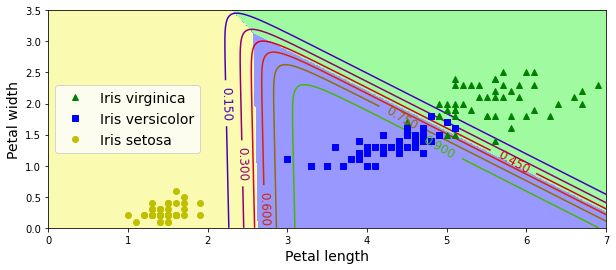

In [77]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
# zz2 = y_proba[:, 2].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

**예측 수행**

In [78]:
softmax_reg.predict([[5, 2]])

array([2])

In [79]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## four features

전체 feature에 대해 수행

In [100]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

clf_all = SGDClassifier(max_iter=1000)
clf_all.fit(X_train, y_train)
clf_all.score(X_test, y_test)

0.9333333333333333

In [82]:
softmax_reg, ovr_clf

(LogisticRegression(C=10, multi_class='multinomial', random_state=42),
 LogisticRegression(C=10, multi_class='ovr', random_state=42))

In [102]:
softmax_reg.fit(X_train, y_train)
softmax_reg.score(X_test, y_test)

C:\Users\wjsdu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9777777777777777

In [103]:
ovr_clf.fit(X_train, y_train)
ovr_clf.score(X_test, y_test)

0.9555555555555556

**모델 평가**

**confusion matrix**

In [41]:
y_pred = clf_all.predict(X_test)
from sklearn import metrics      # import the metrics class
metrics.confusion_matrix(y_test, y_pred)

array([[13,  4,  0],
       [ 0, 10,  1],
       [ 0, 12,  5]], dtype=int64)

**교차 검증**

In [42]:
cv = KFold(5,shuffle=True)
scores = cross_val_score(clf_all, X, y, cv=cv)
print(scores)
scores.mean()
# print(cross_val_score(SGDClassifier(), X, y, cv=cv))    # 거의 100%에 가까운 score 

[0.8        0.6        0.86666667 0.96666667 0.93333333]


0.8333333333333334